In [224]:
import pandas as panda
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [225]:
df = panda.read_csv('TSLA2014.csv')

# Dropping NaN entries 
df.dropna(inplace = True)

#Convert from Date column string to float
df['Date'] = panda.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

# Dropping all unnecessary columns
df_date_close = df.drop(["Open","High","Low", "Adj Close", "Volume"], axis="columns")

In [226]:
# split the data into train and test set
train, test = train_test_split(df_date_close, test_size=0.2, random_state=42, shuffle=False)

In [227]:
# Sepetaing the Date and Stockprice columns for the Train data
train_date = train.drop("Close", axis = "columns")
train_close = train.drop("Date", axis = "columns")

# Sepetaing the Date and Stockprice columns for the Test data
test_close = test.drop("Date", axis = "columns")
test_date = test.drop("Close", axis = "columns")


In [228]:
# linear regression on training data
reg_obj_train = linear_model.LinearRegression()
reg_obj_train.fit(train_date.values, train_close.values)
train_prediction = reg_obj_train.predict(train_date.values)

# Converting int dates into DateTime for train_date
train_date_dt = train_date['Date'].apply(dt.datetime.fromordinal)

In [229]:
train_prediction = reg_obj_train.predict(train_date.values)

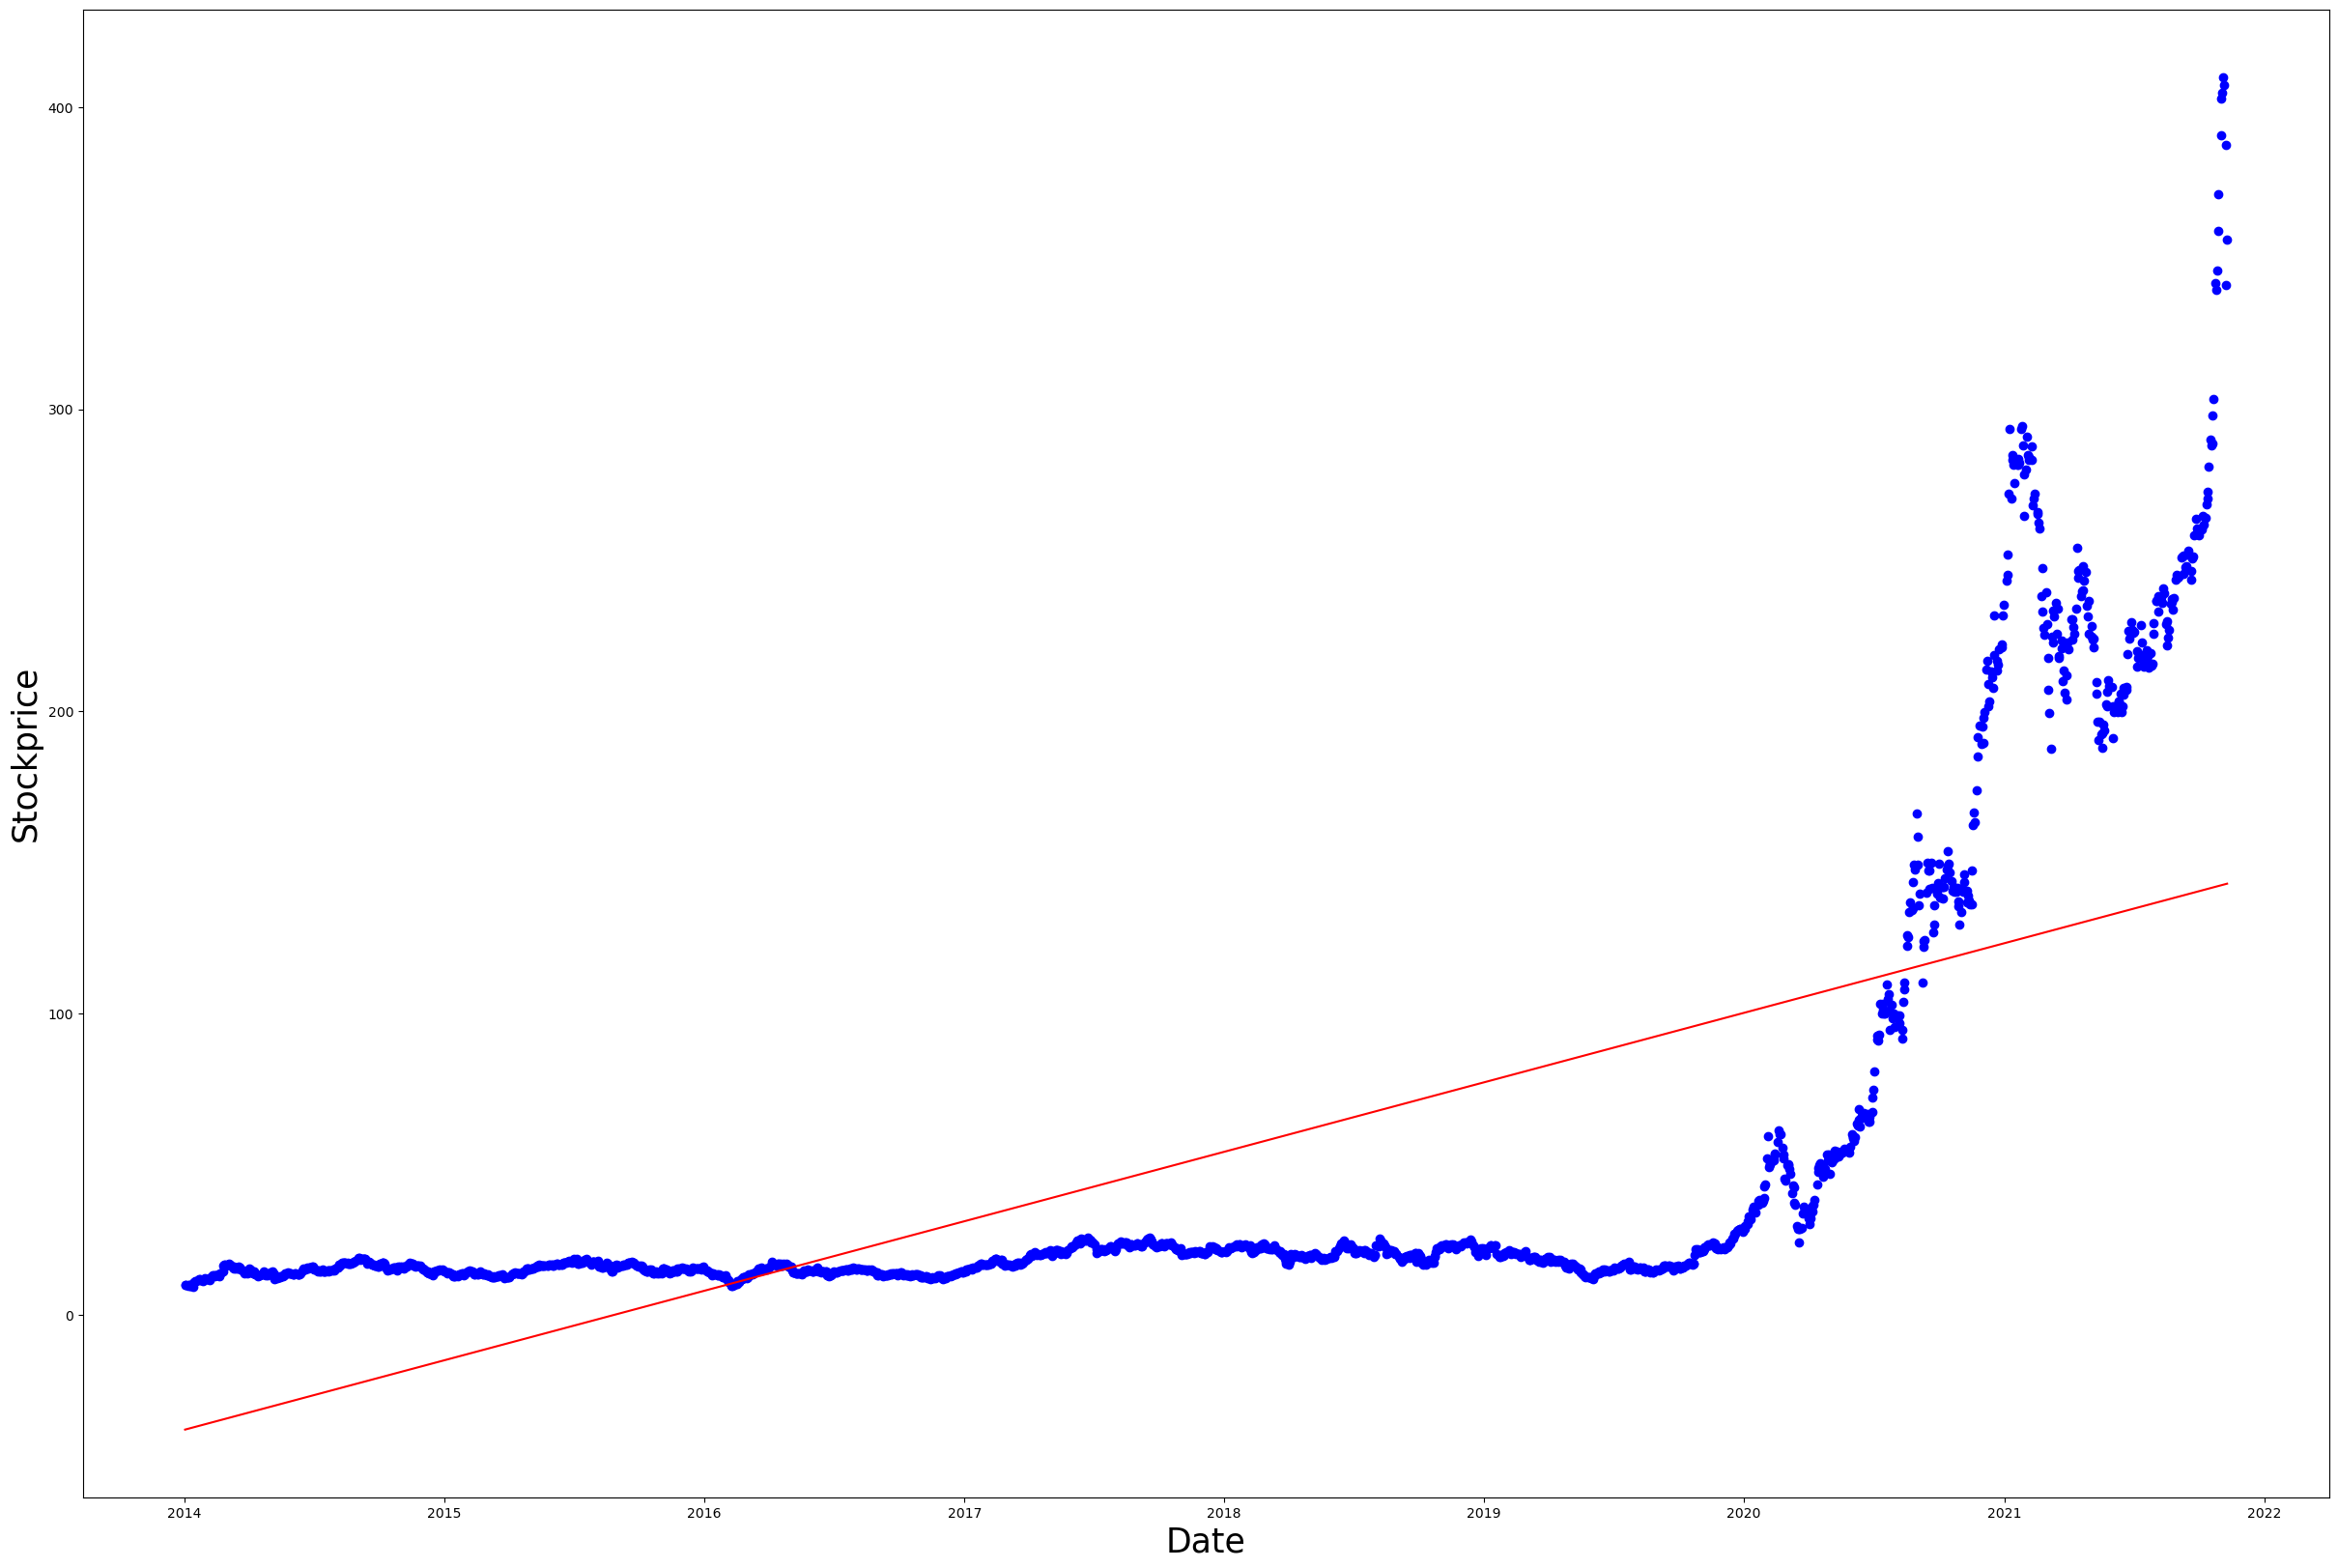

In [230]:
# Plot for visualising the Train data and Linear Regression
plt.figure(figsize=(30,20))
plt.xlabel('Date',fontsize=25)
plt.ylabel('Stockprice',fontsize=25)

#Visual Represention of linear equation with Linear Regression
plt.scatter(train_date_dt,train_close,color='blue')
plt.plot(train_date_dt,train_prediction,color='red')

In [231]:
test_prediction = reg_obj_train.predict(test_date.values)

In [232]:
# Converting int dates into DateTime for test_date
test_date_dt = test_date['Date'].apply(dt.datetime.fromordinal)

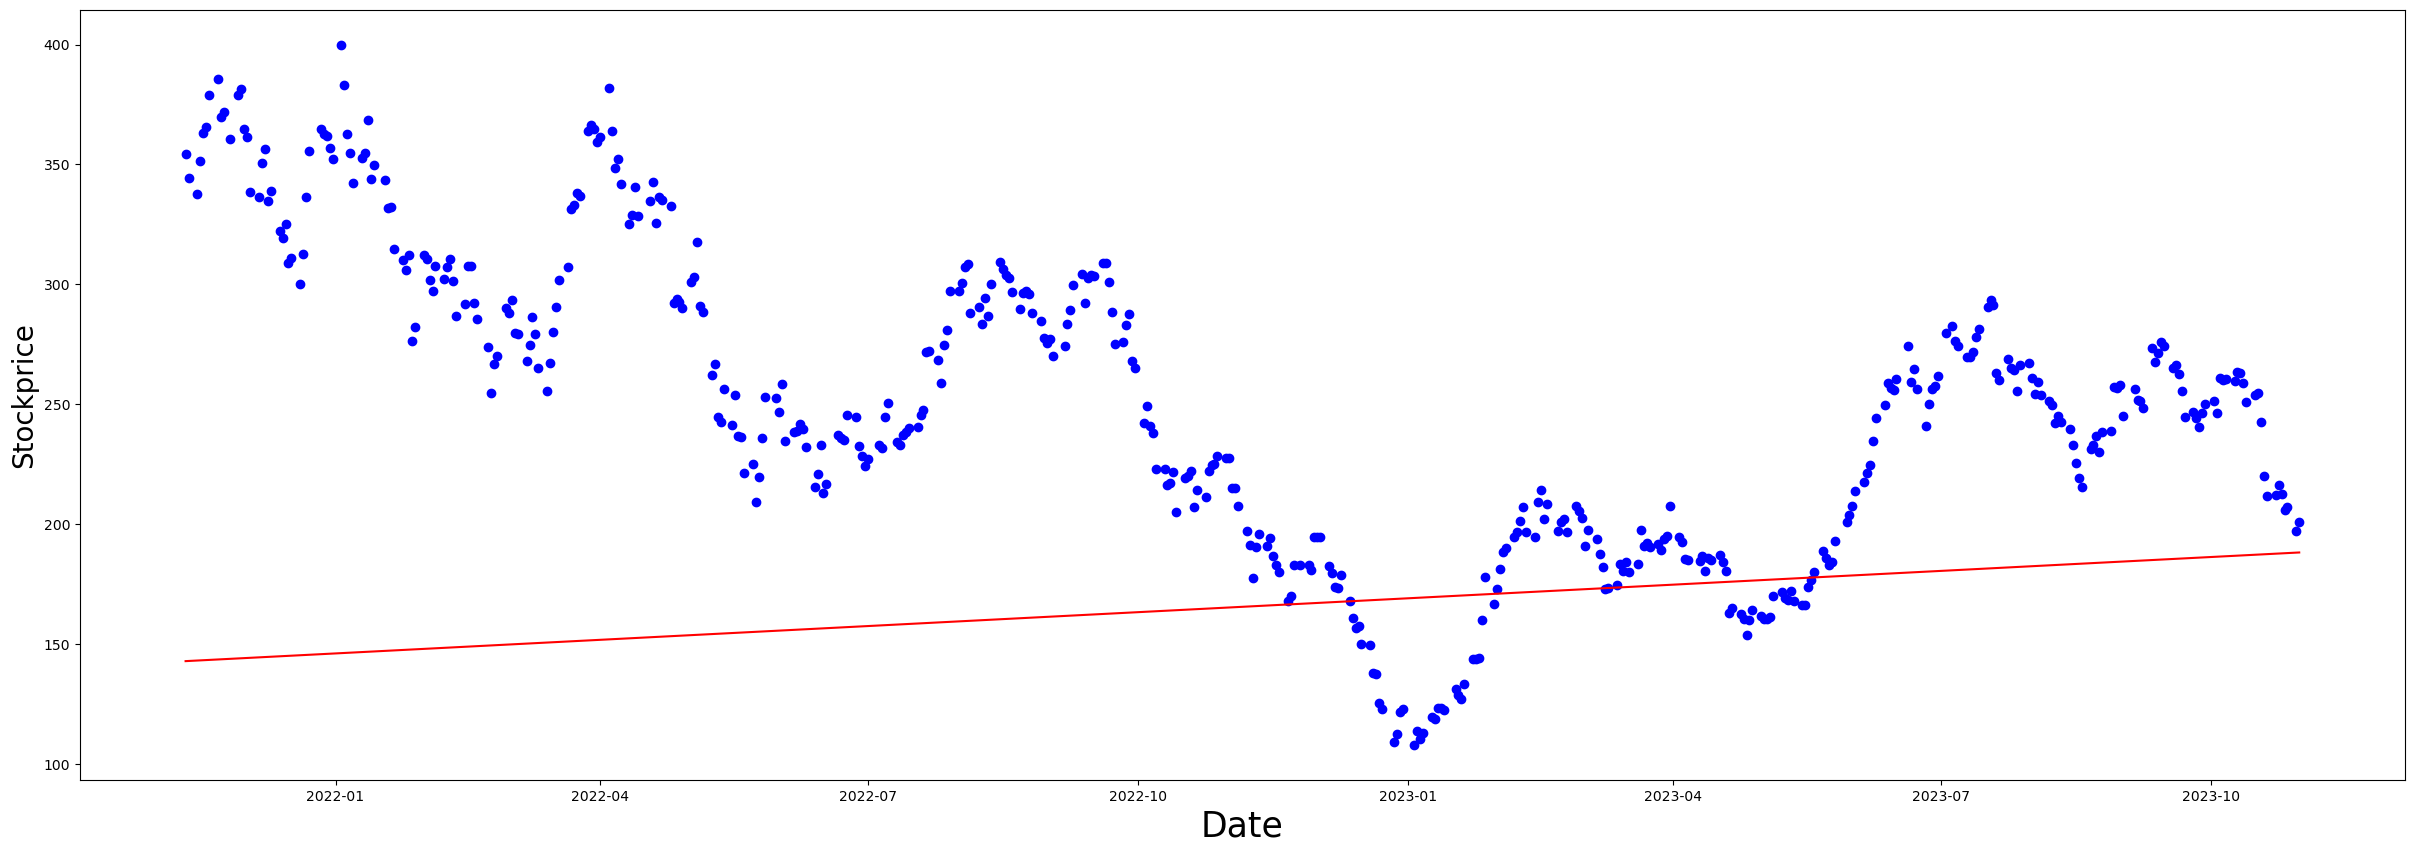

In [233]:
# Plot for visualising predictions on the Test Dataset
plt.figure(figsize=(30,10))
plt.xlabel('Date',fontsize=25)
plt.ylabel('Stockprice',fontsize=20)

# Visual Represention of linear equation with Linear Regression
plt.scatter(test_date_dt,test_close,color='blue')
plt.plot(test_date_dt, test_prediction,color='red')

In [234]:
# Formating input date before input to the prediction algorithm
input_date = dt.date(2020, 1, 1)
input_od = input_date.toordinal()

# Prediction stockprice based on input date
output_train = reg_obj_train.predict([[input_od]])





In [235]:
# Formating input date and predicted stockprice before output
formated_date = input_date.strftime("%D");
formated_stockprice = str('%.10f' % output_train[0][0])

# Outputing the prediction
outputString = "Predicted stock price for " + formated_date + " is: " + formated_stockprice;
print(outputString)

Predicted stock price for 01/01/20 is: 100.1084789569


In [236]:
# Slope of linear equation
print('Coefficients for the Training Dataset: \n', '%.5f' % reg_obj_train.coef_[0][0])

Coefficients for the Training Dataset: 
 0.06300


In [237]:
# Error between line and actual values
print('Mean squared error for the Training Dataset: %.2f'
      % mean_squared_error(train_close, train_prediction))

Mean squared error for the Training Dataset: 3155.13


In [238]:
# Measure for how good the regression fits the data
print('Coefficient of determination for the Training Dataset: %.2f'
      % r2_score(train_close, train_prediction))

Coefficient of determination for the Training Dataset: 0.46
